### Import Libraries

In [1]:
import pandas as pd #using dataframes

import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Load Data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

Convert to dataframe

In [3]:
iris
#type(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_data = iris.data # assigns just the data of of the 'Bunch'
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris_data = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_data['class'] = iris.target # create new column with labels
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Explore

Have a look at the targets

In [6]:
print(iris.target_names)

iris_data['class'].value_counts()

['setosa' 'versicolor' 'virginica']


2    50
1    50
0    50
Name: class, dtype: int64

What is the data structure?

In [7]:
print(iris_data.shape)

iris_data.describe()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


*There is no missing data (n = 150). Petal length and width show large amounts of variation.*

Have a look at the distributions for the targets

In [8]:
# import libraries

# visualise boxplots

## using matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt # scripting interface
%matplotlib inline
mpl.style.use('ggplot') # ggplot-like style

## using seaborn
import seaborn as sns

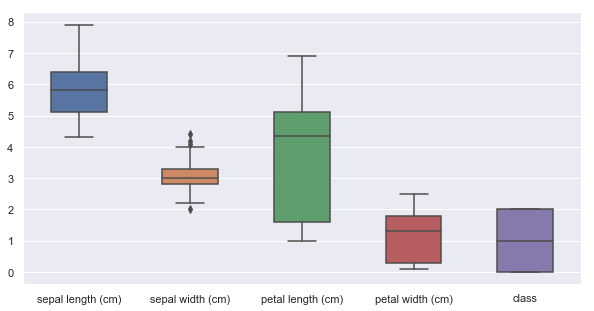

In [30]:
# seaborn boxplot
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data = iris_data, width = 0.5, fliersize = 5)


*Petal length shows the greatest range of values. Sepal width shows a very tight distribution. Both petal measures are skewed to higher values. Sepal length has a normal distribution.*

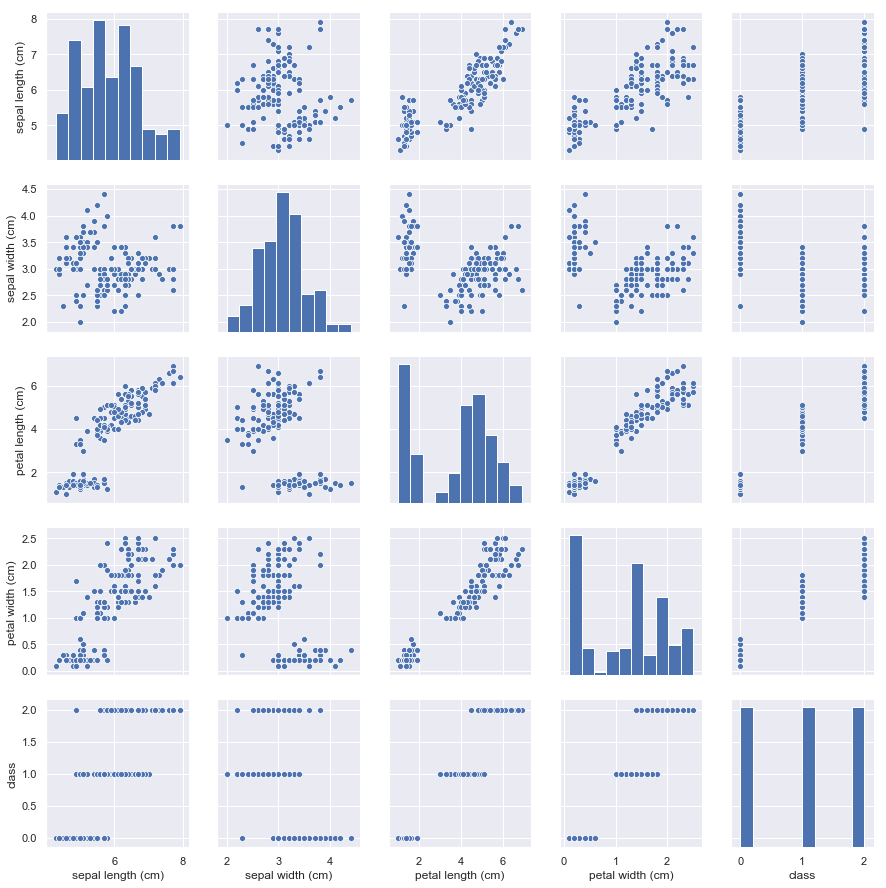

In [11]:
# seaborn correlogram

sns.pairplot(data = iris_data)
plt.show()

*Two distinct groupings can be seen in most scatterplots. The petal measures show the greatest separation between the three classes. Sepal width has the poorest separation*

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Define feature and targets
X = iris_data.values[:,0:4]
Y = iris_data.values[:,4]

# Split
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size = 0.3,
                                                   random_state = 42)

### K Nearest Neighbours

In [37]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train, y_train)
KNN_predictions = KNN_model.predict(x_test)

# Equivalent to Jaccard
print(accuracy_score(y_test, KNN_predictions))

1.0


### Support Vector Machine

In [38]:
SVM_model = SVC()
SVM_model.fit(x_train, y_train)
SVM_predictions = SVM_model.predict(x_test)

# Equivalent to Jaccard
print(accuracy_score(y_test, SVM_predictions))

1.0


C:\DataScience\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Random Forest

In [41]:
RF_model = RandomForestClassifier(n_estimators = 5)
RF_model.fit(x_train, y_train)
RF_predictions = RF_model.predict(x_test)

# Equivalent to Jaccard
print(accuracy_score(y_test, RF_predictions))

1.0


### Logistic Regression

In [42]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
LR_predictions = LR_model.predict(x_test)

# Equivalent to Jaccard
print(accuracy_score(y_test, LR_predictions))

0.9777777777777777


C:\DataScience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\DataScience\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Conclusion

Three of the four machine learning models chosen provided 100% accuracy.